In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

/Users/denissamohvalov/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/denissamohvalov/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df_train = pd.read_csv('/Users/denissamohvalov/Documents/minor-project/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df_test = pd.read_csv('/Users/denissamohvalov/Documents/minor-project/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


Количество пар в обучающей выборке: 404290
Количество пар в тестовой выборке: 2345796
Отношение обучающей к тестовой: 5.802260753419575
Количество одинаковых пар в обучающей выборке: 149263
Доля одинаковых пар в обучающей выборке: 0.369197853026293
Количество уникальных вопросов в обучающей выборке: 537933
Доля уникальных вопросов в обучающей выборке: 0.6652811100942393
Количество вопросов, которые встречаются в обучающей выбор больше 1 раза: 111780
Доля вопросов, которые встречаются в обучающей выборке больше 1 раза: 0.13824235078780084


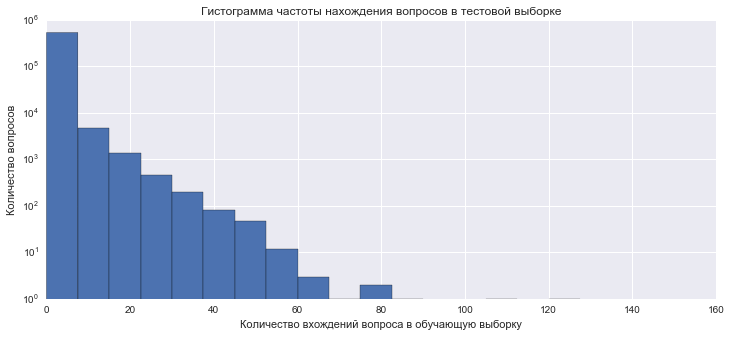

In [43]:
n_train = len(df_train)
n_test = len(df_test)
n_dupl_train = len(df_train[df_train['is_duplicate'] == 1])
print('Количество пар в обучающей выборке: %s' % n_train)
print('Количество пар в тестовой выборке: %s' % n_test)
print('Отношение обучающей к тестовой: %s' % (n_test / n_train))
print('Количество одинаковых пар в обучающей выборке: %s' % n_dupl_train)
print('Доля одинаковых пар в обучающей выборке: %s' % (n_dupl_train / n_train))
q1_train = df_train['qid1'].tolist()
q2_train = df_train['qid2'].tolist()
total_train = pd.Series(q1_train + q2_train)
train_unique = np.unique(total_train)
n_train_unique = len(train_unique)
n_total_train = len(total_train)
n_more_than_one = np.sum(total_train.value_counts() > 1)
print('Количество уникальных вопросов в обучающей выборке: %s' % n_train_unique)
print('Доля уникальных вопросов в обучающей выборке: %s' % (n_train_unique / n_total_train))
print('Количество вопросов, которые встречаются в обучающей выбор больше 1 раза: {0}'.format(n_more_than_one))
print('Доля вопросов, которые встречаются в обучающей выборке больше 1 раза: {0}'.format(n_more_than_one / n_total_train))
plt.figure(figsize=(12, 5))
plt.hist(total_train.value_counts(), bins=20, range=[0,150])
plt.yscale('log')
plt.title('Гистограмма частоты нахождения вопросов в тестовой выборке')
plt.xlabel('Количество вхождений вопроса в обучающую выборку')
plt.ylabel('Количество вопросов')


In [44]:
# больше 15 -  1000,
# есть вопросы, которые встречаются больше 100 раз

In [47]:
print("Максимально встречающийся вопрос, встречается в датасете %s раз" % total_train.value_counts().max())

Максимально встречающийся вопрос встречается в датасете 157 раз


/Users/denissamohvalov/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Среднее количество символов в вопросе: 59.82254817086745
Минимальное число символов в вопросе: 1
Максимальное число символов в вопросе: 1169
Стандартное отклонение числа символов в вопросе: 31.963751494576986


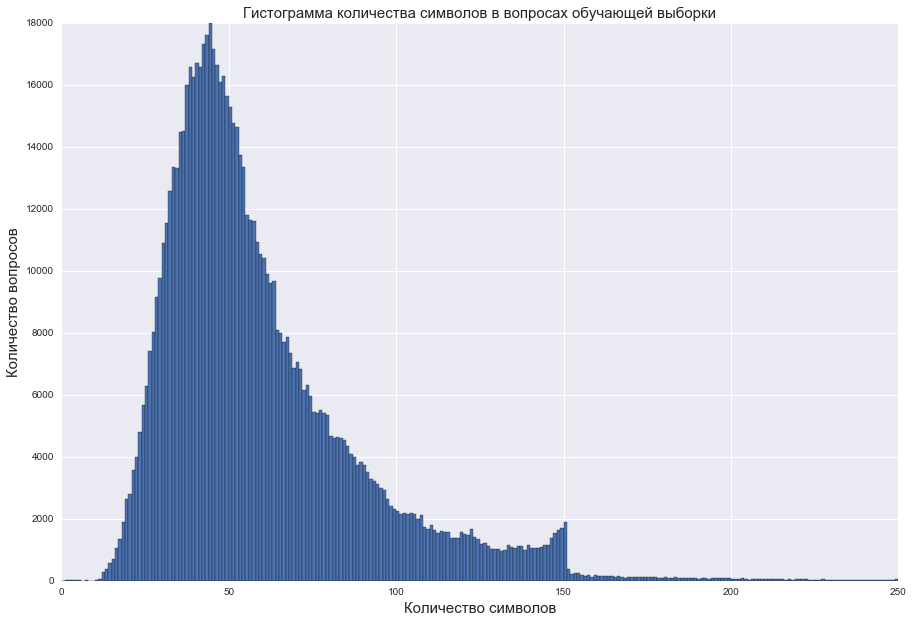

In [70]:
# Обучающая выборка
question1_train = df_train['question1'].tolist()
question2_train = df_train['question2'].tolist()
train_qs = pd.Series(question1_train + question2_train).astype(str)

dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=250, range=[0, 250])
plt.title('Гистограмма количества символов в вопросах обучающей выборки', fontsize=15)
plt.legend()
plt.xlabel('Количество символов', fontsize=15)
plt.ylabel('Количество вопросов', fontsize=15)
print('Среднее количество символов в вопросе: %s' % dist_train.mean())
print('Минимальное число символов в вопросе: %s' % dist_train.min())
print('Максимальное число символов в вопросе: %s' % dist_train.max())
print('Стандартное отклонение числа символов в вопросе: %s' % dist_train.std())

/Users/denissamohvalov/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Среднее количество символов в вопросе: 60.070103282638385
Минимальное число символов в вопросе: 1
Максимальное число символов в вопросе: 1176
Стандартное отклонение числа символов в вопросе: 31.624631019887765


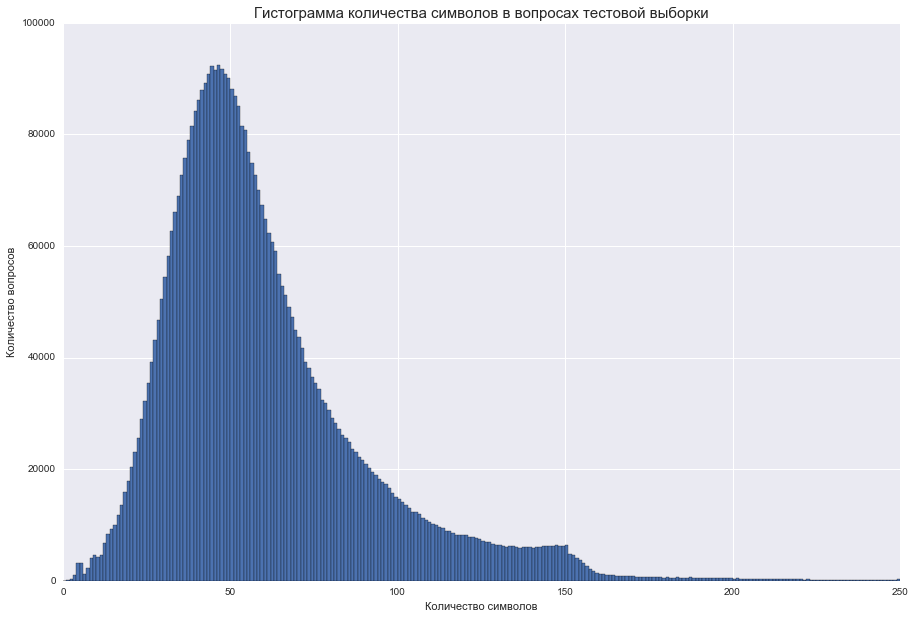

In [71]:
question1_test = df_test['question1'].tolist()
question2_test = df_test['question2'].tolist()
train_qs = pd.Series(question1_test + question2_test).astype(str)

dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=250, range=[0, 250])
plt.title('Гистограмма количества символов в вопросах тестовой выборки', fontsize=15)
plt.legend()
plt.xlabel('Количество символов')
plt.ylabel('Количество вопросов')
print('Среднее количество символов в вопросе: %s' % dist_train.mean())
print('Минимальное число символов в вопросе: %s' % dist_train.min())
print('Максимальное число символов в вопросе: %s' % dist_train.max())
print('Стандартное отклонение числа символов в вопросе: %s' % dist_train.std())

In [72]:
# В тестовой выборке намеренно внедрены искусственно сгенерированные вопросы
# Видимо поэтому распределение выглядит более плавно, чем в обучающе выборке

/Users/denissamohvalov/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Среднее количество слов в вопросе: 11.062100225085953
Минимальное число слов в вопросе: 1
Максимальное число слов в вопросе: 237
Стандартное отклонение числа слов в вопросе: 5.884594849343418


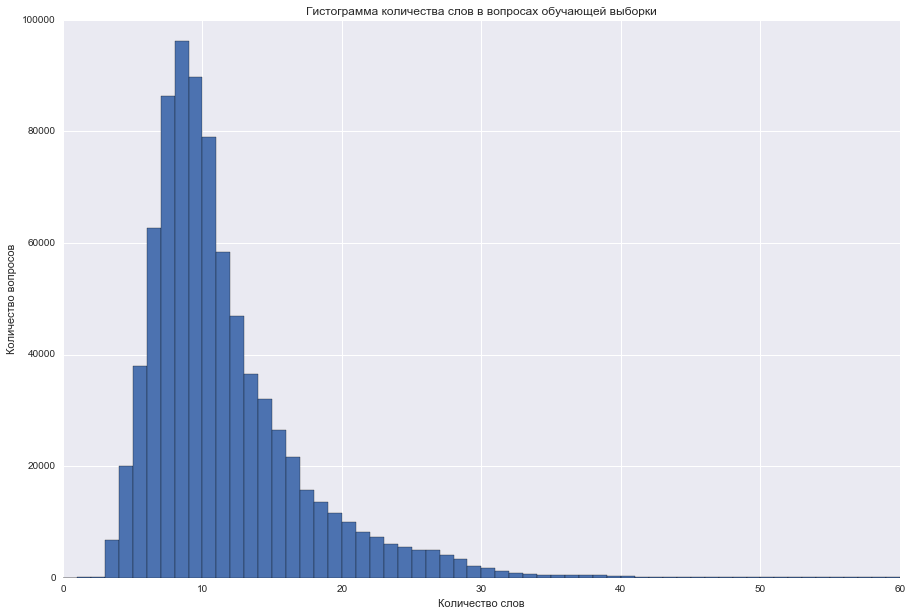

In [73]:
# Обучающая выборка
question1_train = df_train['question1'].tolist()
question2_train = df_train['question2'].tolist()
train_qs = pd.Series(question1_train + question2_train).astype(str)

dist_train = train_qs.apply(lambda x: x.split()).apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=60, range=[0, 60])
plt.title('Гистограмма количества слов в вопросах обучающей выборки')
plt.legend()
plt.xlabel('Количество слов')
plt.ylabel('Количество вопросов')
print('Среднее количество слов в вопросе: %s' % dist_train.mean())
print('Минимальное число слов в вопросе: %s' % dist_train.min())
print('Максимальное число слов в вопросе: %s' % dist_train.max())
print('Стандартное отклонение числа слов в вопросе: %s' % dist_train.std())

/Users/denissamohvalov/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Среднее количество слов в вопросе: 11.01826650740303
Минимальное число слов в вопросе: 1
Максимальное число слов в вопросе: 238
Стандартное отклонение числа слов в вопросе: 5.846748191364327


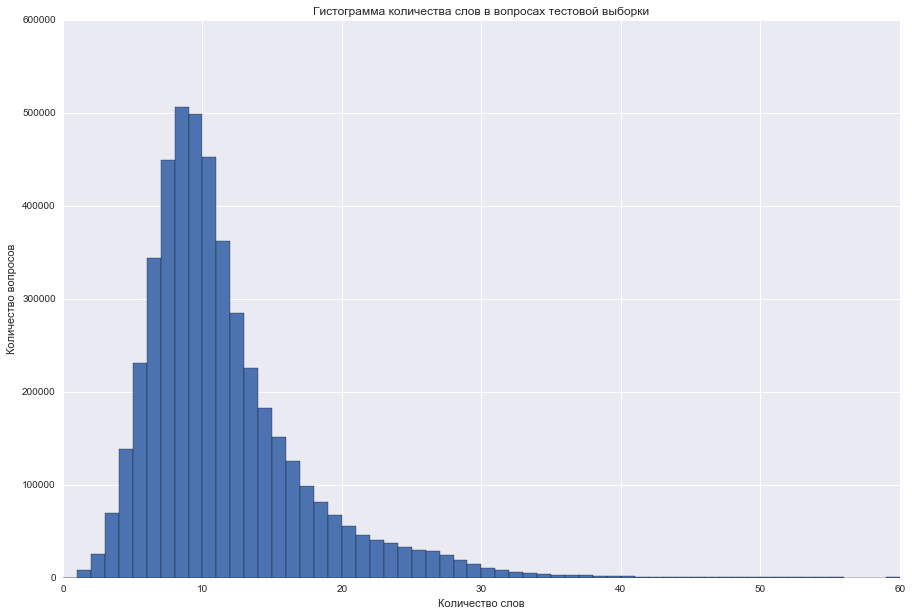

In [69]:
# Тестовая выборка
question1_test = df_test['question1'].tolist()
question2_test = df_test['question2'].tolist()
train_qs = pd.Series(question1_test + question2_test).astype(str)

dist_train = test_qs.apply(lambda x: x.split()).apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=60, range=[0, 60])
plt.title('Гистограмма количества слов в вопросах тестовой выборки')
plt.legend()
plt.xlabel('Количество слов')
plt.ylabel('Количество вопросов')
print('Среднее количество слов в вопросе: %s' % dist_train.mean())
print('Минимальное число слов в вопросе: %s' % dist_train.min())
print('Максимальное число слов в вопросе: %s' % dist_train.max())
print('Стандартное отклонение числа слов в вопросе: %s' % dist_train.std())